In [1]:
import json
import pandas as pd
import numpy as np
import os
import re
from sqlalchemy import create_engine
import time
 

In [2]:
file_dir = 'C://Users/karla/Documents/GitHub/Movies-ETL'

In [3]:
f'{file_dir}/wikipedia-movies.json'

'C://Users/karla/Documents/GitHub/Movies-ETL/wikipedia-movies.json'

In [4]:
with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
    
    print (len(wiki_movies_raw))


7311


In [5]:
# Getting to know wiki_movies_raw data and begin cleaning.
wiki_movies_raw[5]



{'url': 'https://en.wikipedia.org/wiki/The_Ambulance',
 'year': 1990,
 'imdb_link': 'https://www.imdb.com/title/tt0099026/',
 'title': 'The Ambulance',
 'Directed by': 'Larry Cohen',
 'Produced by': ['Larry Cohen', 'Moctesuma Esparza', 'Robert Katz'],
 'Written by': 'Larry Cohen',
 'Starring': ['Eric Roberts',
  'James Earl Jones',
  'Red Buttons',
  'Megan Gallagher'],
 'Music by': 'Jay Chattaway',
 'Cinematography': 'Jacques Haitkin',
 'Edited by': ['Claudia Finkle', 'Armond Leibowitz'],
 'Productioncompany ': 'Epic Productions',
 'Distributed by': 'Triumph Releasing Corporation',
 'Release date': ['March 22, 1990', '(', '1990-03-22', ')'],
 'Running time': '95 minutes',
 'Country': 'United States',
 'Language': 'English'}

In [6]:
wiki_movies_raw[-5]

{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
 'year': 2018,
 'imdb_link': 'https://www.imdb.com/title/tt1255919/',
 'title': 'Holmes & Watson',
 'Directed by': 'Etan Cohen',
 'Produced by': ['Will Ferrell',
  'Adam McKay',
  'Jimmy Miller',
  'Clayton Townsend'],
 'Screenplay by': 'Etan Cohen',
 'Based on': ['Sherlock Holmes',
  'and',
  'Dr. Watson',
  'by',
  'Sir Arthur Conan Doyle'],
 'Starring': ['Will Ferrell',
  'John C. Reilly',
  'Rebecca Hall',
  'Rob Brydon',
  'Steve Coogan',
  'Ralph Fiennes'],
 'Music by': 'Mark Mothersbaugh',
 'Cinematography': 'Oliver Wood',
 'Edited by': 'Dean Zimmerman',
 'Productioncompanies ': ['Columbia Pictures',
  'Gary Sanchez Productions',
  'Mosaic Media Group',
  'Mimran Schur Pictures'],
 'Distributed by': 'Sony Pictures Releasing',
 'Release date': ['December 25, 2018',
  '(',
  '2018-12-25',
  ')',
  '(United States)'],
 'Running time': '90 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$42 million

In [7]:
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [8]:
# Import kaggle csv files into pandas
movies_metadata = pd.read_csv(os.path.join(file_dir, "movies_metadata.csv"), low_memory=False)
ratings = pd.read_csv(os.path.join(file_dir, "ratings.csv"))

In [9]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
movies_metadata.sample(n=5)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
29871,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,31789,tt0117412,fr,Pédale douce,"A closeted gay man's attempt to ""act straight""...",...,1996-03-27,0.0,100.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,What a Drag,False,5.5,28.0
28641,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",NaN,29094,tt0037024,en,The Lodger,The inhabitants of a boarding house fear the n...,...,1944-01-19,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Lodger,False,6.0,13.0
20107,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,115400,tt1610516,en,The Woodmans,"The story of a family that suffers a tragedy, ...",...,2011-01-19,0.0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Woodmans,False,5.0,1.0
41067,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,315252,tt4298406,nl,Sneeuwwitje En De Zeven Kleine Mensen: Een Mod...,NaN,...,2015-01-01,0.0,NaN,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Sneeuwwitje En De Zeven Kleine Mensen: Een Mod...,False,8.0,2.0
34195,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 10749, ...",NaN,40084,tt0083710,fr,Caligula et Messaline,Messalina (played by gorgeous Betty Roland) is...,...,1981-01-01,0.0,111.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Caligula and Messalina,False,2.2,5.0


In [11]:
movies_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [12]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [13]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990
26024288,270896,71878,2.0,1257031858


In [14]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
15625183,162595,5527,3.0,1494520950
23190965,240688,153,3.0,840366808
22566458,234423,265,5.0,828454759
5868755,60363,36519,2.5,1431185384
24200656,251298,163645,3.5,1500950685


In [15]:
# number of rows
len(movies_metadata)

45466

In [16]:
# Column headders and count of unique values
movies_metadata.count()


adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [17]:
#data types in use
movies_metadata.dtypes


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [18]:
#start working with wiki dataset
#Convert to dataframe to begin cleaning data

wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wiki_movies_df.tail()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
7306,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018.0,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7307,https://en.wikipedia.org/wiki/Vice_(2018_film),2018.0,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7308,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018.0,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7309,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018.0,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7310,https://en.wikipedia.org/wiki/Black_Mirror:_Ba...,2018.0,https://www.imdb.com/title/tt9495224/,Bandersnatch,David Slade,Russell McLean,NaN,NaN,NaN,"[Fionn Whitehead, Will Poulter, Craig Parkinso...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
wiki_movies_df.sample(n=5)

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
4306,https://en.wikipedia.org/wiki/Loving_Annabelle,2006.0,https://www.imdb.com/title/tt0323120/,Loving Annabelle,Katherine Brooks,"[Jennifer Young, Gregory Carroll, Katherine Br...",NaN,NaN,NaN,"[Erin Kelly, Diane Gaidry]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4044,https://en.wikipedia.org/wiki/Where_the_Truth_...,2005.0,https://www.imdb.com/title/tt0373450/,Where the Truth Lies,Atom Egoyan,Robert Lantos,Atom Egoyan,NaN,"[Where the Truth Lies, by, Rupert Holmes]","[Kevin Bacon, Colin Firth, Alison Lohman, Rach...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4024,https://en.wikipedia.org/wiki/The_Thing_About_...,2005.0,https://www.imdb.com/title/tt0429177/,The Thing About My Folks,Raymond De Felitta,"[Paul Reiser, Robert Newmyer, Jeffrey Silver]",NaN,NaN,NaN,"[Peter Falk, Paul Reiser, Olympia Dukakis]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,https://en.wikipedia.org/wiki/S.F.W.,1994.0,https://www.imdb.com/title/tt0111048/,S.F.W.,Jefery Levy,"[Mike Nelson, Dale Pollock, Sigurjon Sighvatsson]","[Danny Rubin, Jefery Levy]",NaN,"[the novel by, Andrew Wellman]","[Stephen Dorff, Reese Witherspoon]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2925,https://en.wikipedia.org/wiki/A_Beautiful_Mind...,2001.0,https://www.imdb.com/title/tt0268978/,A Beautiful Mind,Ron Howard,"[Brian Grazer, Ron Howard]",NaN,NaN,"[A Beautiful Mind, by, Sylvia Nasar]","[Russell Crowe, Ed Harris, Jennifer Connelly, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#investigate column titles
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [22]:
#Begin using list comprehensions as a means to filter our data  'No of episodes' not in movie only reduces by 4. consolidated resultin 
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                  and 'No. of episodes' not in movie]
len(wiki_movies)


7076

In [23]:

wiki_movies_df = pd.DataFrame(wiki_movies)

In [24]:
#starting a first function and making a non-destructive copy of our dataset
def clean_movie(movie):
    movie_copy = dict(movie) 
    return movie

In [25]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

6834    https://en.wikipedia.org/wiki/The_Insult_(film)
7058     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [26]:
wiki_movies_df.head()


,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
len(wiki_movies_df['Also known as'])

7076

In [28]:
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplifie

In [29]:
#testing to check out a language...in this case hangul
for i in range(len(wiki_movies_df['Hangul'])):
    if wiki_movies_df['Hangul'][i] is not np.nan:
        print(wiki_movies_df['Hangul'][i])

원더풀 데이즈
파이 스토리


In [30]:
# Loop though and check for all the alternate title languages.  Start by creating a new df to keep original in tact.
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        # checking each "key" and removing key-value pair if the language key is in the dictionary
        if key in movie: 
            alt_titles[key] = movie[key]
            movie.pop(key) 
        # add the alternate titles to the dictionary
        if len(alt_titles) > 0:
            movie['alt_titles'] = alt_titles 
    
    return movie


In [31]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [32]:
#create new dataframe with the cleaned movie list
wiki_movies_df = pd.DataFrame(clean_movies)
#check out the new list of columns
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Length',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Written by',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [33]:
   def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    
    # Empty dict to hold all alt titles
    alt_titles = {}
   
    # Loop through a list of all alternative title keys
    for alt_title_key in ["Also known as", "Arabic", "Cantonese", "Chinese", "French", 
                          "Hangul", "Hebrew", "Hepburn", "Japanese", "Literally", 
                          "Mandarin", "McCune–Reischauer", "Original title", "Polish", 
                          "Revised Romanization", "Romanized", "Russian", "Simplified", 
                          "Traditional", "Yiddish"]:
    
        # Check if the current key exists in the movie object
        if alt_title_key in movie:
            
            # Add to alt_titles dict and remove from movie object
            alt_titles[alt_title_key] = movie[alt_title_key]
            movie.pop(alt_title_key)
    
    # add alternative titles dict to the movie object
    if len(alt_titles) > 0:
        movie["alt_titles"] = alt_titles
      
  # consolidate/change column names using a function
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Music by', 'Composer(s)')
    change_column_name("Productioncompany ", "Production company(s)")
    change_column_name("Productioncompanies ", "Production company(s)")
    change_column_name('Original release', 'Release date')
    change_column_name('Released', 'Release date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Length', 'Running time')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie
    
    

In [34]:
# List of clean movies
clean_movies = [clean_movie(movie) for movie in wiki_movies]
# Make a df from that list
wiki_movies_df = pd.DataFrame(clean_movies)
# list of columns
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [35]:
#working with imdb links - 
wiki_movies_df["imdb_id"] = wiki_movies_df['imdb_link'].str.extract(r"(tt\d{7})")
# Check length before removing duplicates
print(len(wiki_movies_df))
# Remove the duplicates
wiki_movies_df.drop_duplicates(subset="imdb_id", inplace=True)
# Check length
print(len(wiki_movies_df))
wiki_movies_df.head()
    
    

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [36]:
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Producer(s)', 202],
 ['Composer(s)', 518],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['imdb_id', 0]]

In [37]:
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Producer(s)',
 'Composer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [38]:
#Consoldiating which columns to keep
wiki_columns_to_keep = [
    column for column in wiki_movies_df.columns 
    if wiki_movies_df[column].isnull().sum() < (len(wiki_movies_df) * 0.9)
]
wiki_columns_to_keep

#wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

#wiki_movies_df

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Editor(s)',
 'Producer(s)',
 'Composer(s)',
 'Production company(s)',
 'Writer(s)',
 'imdb_id']

In [39]:
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

wiki_movies_dfbox_office = wiki_movies_df['Box office'].dropna()

wiki_movies_df


,url,year,imdb_link,title,Based on,Starring,Cinematography,Release date,Running time,Country,...,Budget,Box office,Director,Distributor,Editor(s),Producer(s),Composer(s),Production company(s),Writer(s),imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,United States,...,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Steve Perry, Joel Silver]","[Cliff Eidelman, Yello]",Silver Pictures,"[David Arnott, James Cappe]",tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,United States,...,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,"[Ric Kidney, Robert Redlin]",Maurice Jarre,Avenue Pictures,"[James Foley, Robert Redlin]",tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,United States,...,$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,Charles Gross,"[Carolco Pictures, IndieProd Company]","[John Eskow, Richard Rush]",tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,United States,...,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,Robert Greenhut,NaN,NaN,Woody Allen,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,"December 19, 1990",95 minutes,US,...,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,John Cornell,Maurice Jarre,NaN,Paul Hogan,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Oliver Wood,"[December 25, 2018, (, 2018-12-25, ), (United ...",90 minutes,United States,...,$42 million,$41.9 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Mark Mothersbaugh,"[Columbia Pictures, Gary Sanchez Productions, ...",Etan Cohen,tt1255919
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Greig Fraser,"[December 11, 2018, (, 2018-12-11, ), (, Samue...",132 minutes,United States,...,$60 million,$76.1 million,Adam McKay,Mirror Releasing,Hank Corwin,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",Nicholas Britell,"[Plan B Entertainment, Gary Sanchez Production...",Adam McKay,tt6266538
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Michael Grady,"[November 8, 2018, (, 2018-11-08, ), (, AFI Fe...",120 minutes,United States,...,$20 million,$38.4 million,Mimi Leder,Focus Features,Michelle Tesoro,Robert W. Cort,Mychael Danna,"[Focus Features, [1], Participant Media, [1], ...",Daniel Stiepleman,tt4669788
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,"[Nicole Kidman, Sebastia

In [40]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Producer(s)              object
Composer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [41]:
# Make series for box office without nulls
box_office = wiki_movies_df["Box office"].dropna()
box_office.sample(n=20)

40            $715,983
2242      $4.4 million
5133    $319.7 million
3723     $45.1 million
7029     $29.3 million
1269       $26,325,256
2977    $147.1 million
789         $1,038,959
1340        $3,565,508
4335     $69.5 million
6569       $23 million
5635          $102,388
489        $21,591,800
5244      $1.8 million
5332       $97 million
1376       $12,096,881
2459      $3.1 million
4483     $69.5 million
486       $8.2 million
4102    $660.9 million
Name: Box office, dtype: object

In [42]:
# Check the length
len(box_office)

5485

In [43]:
def is_not_a_string(x):
   return type(x) != str 

box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [44]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [45]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [46]:
# Regular expression for "$123.45 (mb)illion"
form_one = r'\$\d+\.?\d*\s*[mb]illion'

In [47]:
# Count number of box office values matching the form_one
box_office.str.contains(form_one, flags=re.IGNORECASE,na=False).sum()

3896

In [48]:
# Regular expression for form of this value "$123,455,097"
form_two = r'\$\d{1,3}(?:,\d{3})+'

In [49]:
# Count number of box office values matching the form_two
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()


1544

In [50]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

In [51]:
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [52]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [53]:
#Learning about ValueErrors
box_office[(not matches_form_one) and (not matches_form_two)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [54]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [55]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)"

In [56]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [57]:
# Function to convert extracted values to numeric values
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        # remove dollar sign and "million"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a million
        value = float(s) * 10**6
        # return value
        return value
    
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
    
        # remove dollar sign and "billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        # return value
        return value
    
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):    
        # remove dollar sign and commas
        s = re.sub('\$|,', '', s)
        # covert to float
        value = float(s)
        # return value
        return value
    
  # otherwise, return NaN
    else:
        return np.nan 

In [58]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [59]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [60]:
# start cleaning budget data.
budget = wiki_movies_df['Budget'].dropna()
budget.head()


0    $20 million
1     $6 million
2    $35 million
3    $12 million
4    $25 million
Name: Budget, dtype: object

In [61]:
budget.tail()


7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, dtype: object

In [62]:
budget.sample(n=5)

4799                 $6 million
2595                $30 million
3279    $10,000,000 (estimated)
5850           $130-155 million
6603               $2.5 million
Name: Budget, dtype: object

In [63]:
#convertany lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [64]:
# remove any data between the dollar sign and any hyphens in case data is in a range
budget = budget.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

C:\Users\karla\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:156: FutureWarning: Possible set difference at position 6
  pat = re.compile(pat, flags=flags)


In [65]:
# Create two booleans series to describe which values match which series
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

110                     $5–7 million
136                          Unknown
196     $6.5–10 million [1] [Note 1]
204      60 million Norwegian Kroner
235                   $50–65 million
                    ...             
7062                $100–150 million
7066                $160–200 million
7067                $102–135 million
7068                  $39–50 million
7070                    €4.3 million
Name: Budget, Length: 230, dtype: object

In [66]:

# dealing with citations and ref numbers.
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\karla\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


110                    $5–7 million
136                         Unknown
196        $6.5–10 million [Note 1]
204     60 million Norwegian Kroner
235                  $50–65 million
                   ...             
7062               $100–150 million
7066               $160–200 million
7067               $102–135 million
7068                 $39–50 million
7070                   €4.3 million
Name: Budget, Length: 230, dtype: object

In [67]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [68]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [69]:
# Parse Release Date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)
release_date.sample(n=10)

3119                         June 21, 2002 ( 2002-06-21 )
1070                       August 24, 1994 ( 1994-08-24 )
4064                         June 16, 2006 ( 2006-06-16 )
200                                         1990 ( 1990 )
5510    August 4, 2012 ( 2012-08-04 ) ( TCFF ) August ...
5679                        April 27, 2012 ( 2012-04-27 )
1667                         July 17, 1996 ( 1996-07-17 )
3380    October 26, 2003 ( 2003-10-26 ) ( HIFF ) Augus...
2326                        April 10, 1998 ( 1998-04-10 )
3285                     December 16, 2003 ( 2003-12-16 )
Name: Release date, dtype: object

In [70]:
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'

In [71]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)


In [72]:
# Parse Running Time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: " ".join(x) if type(x) == list else x)
running_time

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object

In [73]:
# Use string boundaries to check how many are '100 minutes' format
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [74]:
# Check other formats for data
running_time[~running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE)]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [75]:
# Update the format by only searching for m
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [76]:
# Check other formats 
running_time[~running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE)]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [77]:
# Format data for hour + minute
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [78]:
# Format data to numeric in minutes
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
running_time_extract

,0,1,2
0,0.0,0.0,102.0
1,0.0,0.0,114.0
2,0.0,0.0,113.0
3,0.0,0.0,106.0
4,0.0,0.0,95.0
...,...,...,...
7071,0.0,0.0,90.0
7072,0.0,0.0,132.0
7073,0.0,0.0,120.0
7074,0.0,0.0,123.0


In [79]:
# Parse data
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [80]:
# Drop Release date column
wiki_movies_df.drop('Release date', axis=1, inplace=True)

In [81]:
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Running time,Country,Language,...,Editor(s),Producer(s),Composer(s),Production company(s),Writer(s),imdb_id,box_office,budget,release_date,running_time
3236,https://en.wikipedia.org/wiki/Amandla!:_A_Revo...,2003,https://www.imdb.com/title/tt0303297/,Amandla!: A Revolution in Four-Part Harmony,NaN,NaN,"[Brand Jordaan, Ivan Leathers, Clive Sacke]",NaN,South Africa / U.S.A,"[English /, Zulu]",...,Johanna Demetrakas,Sherry Simpson Dean & Desiree Markgraaff,NaN,ATO Pictures,NaN,tt0303297,NaN,NaN,2002-01-01,NaN
1937,https://en.wikipedia.org/wiki/Inferno_(1997_film),1997,https://www.imdb.com/title/tt0119367/,Inferno,NaN,"[Don Wilson, Deepti Bhatnagar, R. Madhavan]",Gary Graver,82 minutes,United States,English,...,NaN,"[Ashok Amritraj, Andrew Stevens, Roger Corman]",Jeff Walton,Royal Oaks Entertainment,Sean O'Bannon,tt0119367,NaN,NaN,1997-01-01,82.0
5739,https://en.wikipedia.org/wiki/Abandoned_Mine,2013,https://www.imdb.com/title/tt1329404/,Abandoned Mine,NaN,"[Alexa Vega, Reiley McClendon, Saige Thompson,...",NaN,95 minutes,NaN,NaN,...,"[Michael R. Fox, Steve Haugen]","[Scott Woldman, Jeff Chamberlain, Mark Victor,...",Russ Howard III,Mountainbridge Films,Scott Woldman,tt1329404,NaN,NaN,2013-08-15,95.0
1503,https://en.wikipedia.org/wiki/Color_of_a_Brisk...,1996,https://www.imdb.com/title/tt0115925/,Color of a Brisk and Leaping Day,NaN,Peter Alexander,Rob Sweeney,87 minutes,United States,English,...,Christopher Münch,Andrea Sperling,NaN,NaN,"[Christopher Münch, Caveh Zahedi, (script cons...",tt0115925,NaN,NaN,1996-01-01,87.0
6335,https://en.wikipedia.org/wiki/Hot_Tub_Time_Mac...,2015,https://www.imdb.com/title/tt2637294/,Hot Tub Time Machine 2,NaN,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",Declan Quinn,93 minutes,United States,English,...,Jamie Gross,Andrew Panay,Christophe Beck,"[Paramount Pictures, [1], Metro-Goldwyn-Mayer,...",Josh Heald,tt2637294,13100000.0,18000000.0,2015-02-20,93.0
2359,https://en.wikipedia.org/wiki/The_4th_Floor_(1...,1999,https://www.imdb.com/title/tt0167752/,The 4th Floor,NaN,"[Juliette Lewis, William Hurt, Shelley Duvall,...",Michael Slovis,90 minutes,United States,English,...,Tricia Cooke,"[Boaz Davidson, Naomi Despres, John Thompson, ...",Brian Tyler,NaN,Josh Klausner,tt0167752,NaN,NaN,1999-08-01,90.0
6658,https://en.wikipedia.org/wiki/The_Lost_City_of...,2017,https://www.imdb.com/title/tt1212428/,The Lost City of Z,"[The Lost City of Z, by, David Grann]","[Charlie Hunnam, Robert Pattinson, Sienna Mill...",Darius Khondji,141 minutes,United States,English,...,"[John Axelrad, Lee Haugen]","[Dede Gardner, Jeremy Kleiner, Anthony Katagas...",Christopher Spelman,"[Plan B Entertainment, Keep Your Head Producti...",James Gray,tt1212428,19300000.0,30000000.0,2016-10-15,141.0
294,https://en.wikipedia.org/wiki/City_Slickers,1991,https://www.imdb.com/title/tt0101587/,City Slickers,NaN,"[Billy Crystal, Daniel Stern, Bruno Kirby, Pat...",Dean Semler,112 minutes,United States,English,...,O. Nicholas Brown,Irby Smith,Marc Shaiman,"[Castle Rock Entertainment, Face Productions, ...","[Lowell Ganz, Babaloo Mandel]",tt0101587,180000000.0,26000000.0,1991-01-01,112.0
1075,https://en.wikipedia.org/wiki/Richie_Rich_(film),1994,https://www.imdb.com/title/tt0110989/,Richie Rich,"[Richie Rich, by, Alfred Harvey, Warren Kremer]","[Macaulay Culkin, John Larroquette, Edward Her...",Don Burgess,96 minutes,United States,English,...,Malcolm Campbell,"[Joel Silver, John Davis]",Alan Silvestri,"[Silver Pictures, Davis Entertainment, The Har...",Neil Tolkin,tt0110989,38100000.0,40000000.0,1994-12-21,96.0
2940,https://en.wikipedia.org/wiki/The_Pledge_(film),2001,https://www.imdb.com/title/tt0237572/,The Pledge,"[The Pledge, by, Friedrich Dürrenmatt]","[Jack Nicholson, Aaron Eckhart, Helen Mirren, ...",Chris Menges,123 minutes,United States,English,...,Jay Lash Cassidy,Michael Fitzgerald,"[Klaus Badelt, Hans Zimmer]","[Clyde Is Hungry Films, Epsilon Motion Picture...","[Jerzy

In [82]:
#recheck movies_metadata dtypes
movies_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [83]:
# Check values in 'adult' and 'video' columns
print(movies_metadata['adult'].value_counts(),
movies_metadata['video'].value_counts())


False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64 False    45367
True        93
Name: video, dtype: int64


In [84]:
# Remove bad data
movies_metadata[~movies_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Keep columns where 'adult' is False and drop the 'adult' column
movies_metadata = movies_metadata[movies_metadata['adult'] == 'False'].drop('adult', axis=1)

In [87]:
# Convert data types
movies_metadata['video'] = movies_metadata['video'] == 'True'
movies_metadata['video'].dtypes


dtype('bool')

In [89]:
# Convert other types
movies_metadata['budget'] = movies_metadata['budget'].astype(int)
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='raise')
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='raise')
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'])


In [90]:
# Check the ratings data
ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


C:\Users\karla\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [91]:

ratings


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556
...,...,...,...,...
26024284,270896,58559,5.0,1257031564
26024285,270896,60069,5.0,1257032032
26024286,270896,63082,4.5,1257031764
26024287,270896,64957,4.5,1257033990


In [92]:
# Convert Unix dates to regular date format 
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [93]:
# Assign it to the df
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

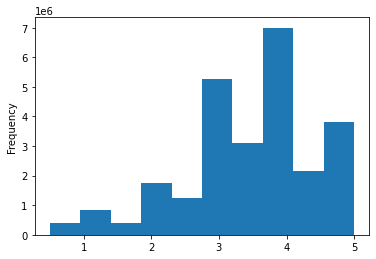

In [94]:
# bar chart
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [95]:
# Median
np.median(ratings['rating'])

3.5

In [96]:
# Merge wiki and kaggle data
movies_df = pd.merge(wiki_movies_df, movies_metadata, on='imdb_id', suffixes=['_wiki', '_kaggle'])

In [97]:
# Check columns
sorted(movies_df.columns.tolist())

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Running time',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

In [98]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle
# running_time             runtime
# budget_wiki              budget_kaggle
# box_office               revenue
# release_date_wiki        release_date_kaggle
# Language                 original_language
# Production company(s)    production_companies